In [1]:
import proplot as plot
import numpy as np
import yaml
import glob

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
import sys

import pizza_cutter

logging.basicConfig(stream=sys.stdout)
for code in ["ngmix", "metadetect", "pizza_cutter", "pizza_cutter_sims"]:
    logging.getLogger(code).setLevel(
        getattr(logging, "DEBUG_PLOT"))

In [23]:
from pizza_cutter_sims.sim import generate_sim
from pizza_cutter_sims.constants import PIXEL_SCALE

rng = np.random.RandomState()
gal_rng = np.random.RandomState(seed=42)

with open(glob.glob("../runs/run0010_*/config.yaml")[0]) as fp:
    cfg = yaml.safe_load(fp.read())

data = generate_sim(
    rng=rng,
    gal_rng=gal_rng,
    coadd_config=cfg["coadd"],
    se_config=cfg["se"],
    psf_config=cfg["psf"],
    gal_config=cfg["gal"],
    layout_config=cfg["layout"],
    msk_config=cfg["msk"],
    shear_config=cfg["shear"],
)

DEBUG:pizza_cutter_sims.wcs:generated wcs: galsim.AffineTransform(0.263, 0.0, 0.0, 0.263, origin=galsim.PositionD(x=206.0, y=206.0), world_origin=galsim.PositionD(x=0.0, y=0.0))
DEBUG:pizza_cutter_sims.psf:psf config: {'type': 'Gaussian', 'fwhm': 1.000173373304822, 'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}
DEBUG:pizza_cutter_sims.psf:galsim psf: galsim.Gaussian(sigma=0.42473452500769615)
DEBUG:pizza_cutter_sims.gals:using 'grid' layout
DEBUG:pizza_cutter_sims.gals:using 'exp-bright' gal type w/ mag 18


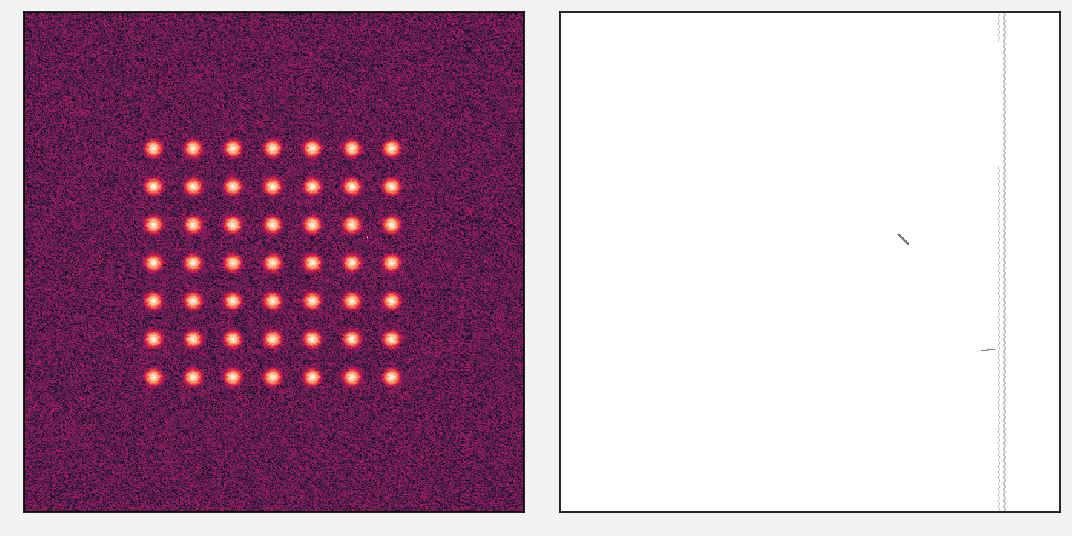

In [24]:
fig, axs = plot.subplots(nrows=len(data["img"]), ncols=2)

for i in range(len(data["img"])):
    
    axs[i, 0].pcolormesh(np.arcsinh(data["img"][i]*np.sqrt(data["wgt"][i])), cmap="rocket")
    axs[i, 0].set_aspect(1)
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 1].pcolormesh(data["msk"][i], cmap="rocket_r")
    axs[i, 1].set_aspect(1)
    axs[i, 1].xaxis.set_visible(False)
    axs[i, 1].yaxis.set_visible(False)


In [27]:
np.unique(data["msk"])

array([0, 1, 2], dtype=int32)

INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for coadd/coadd
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for epoch0/epoch0
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:generating slice objects for ra,dec = 0.0|0.0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:found possible image epoch0/epoch0


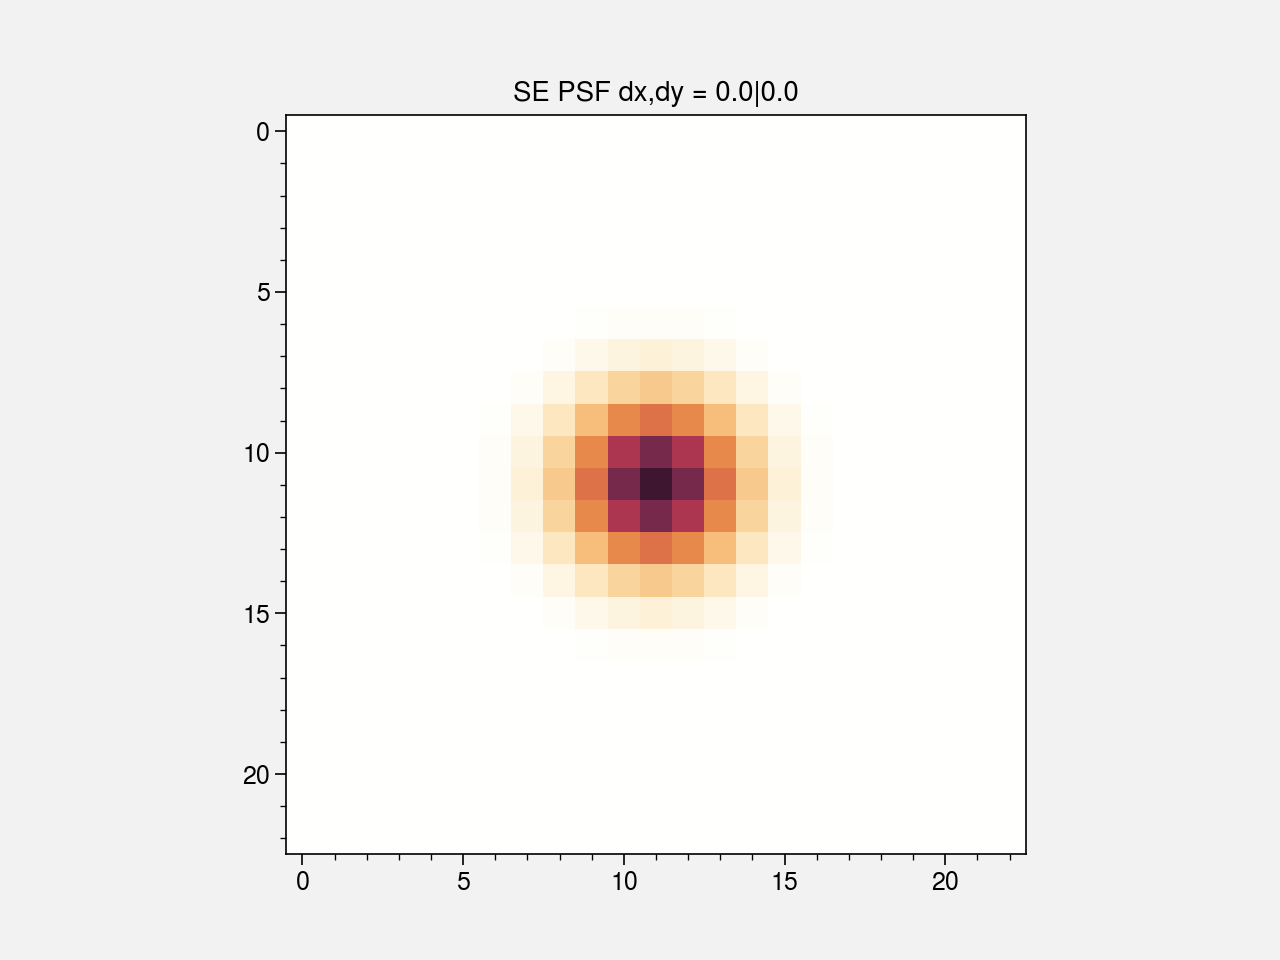

INFO:pizza_cutter.des_pizza_cutter._coadd_slices:images found in rough cut: 1
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:pre-proccseeing image epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:symmetrizing the masks
DEBUG:pizza_cutter.slice_utils.interpolate:doing image interpolation
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:coadding weights: [1.0]
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:resampling image epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs inverse cache miss for epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp cache info: CacheInfo(hits=0, misses=2, maxsize=32, currsize=2)
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs interp took 0.074315 seconds
DEBUG:pizza_cutter.des_pizza_cutter._se_image:wcs area interp cache miss for epoch0/epoch0
DEBUG:pizza_cutter.des_pizza_cutter._se_image:SE wcs area cache info: CacheInfo(hits=0, misses=3, maxsize=32, currsize=3)
DEBUG:pizza_cutter.des_pizza_cutter._se_i

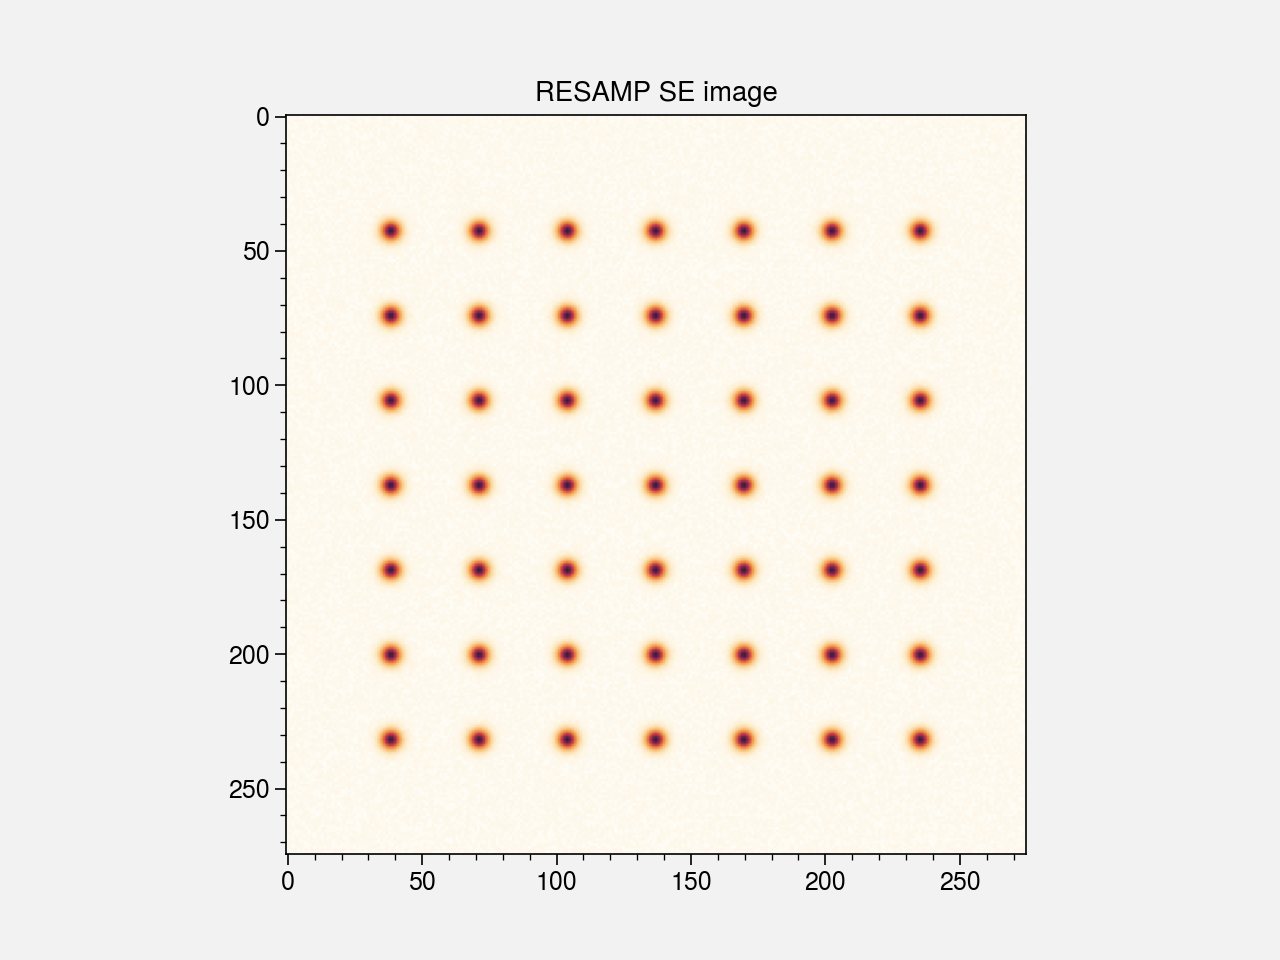

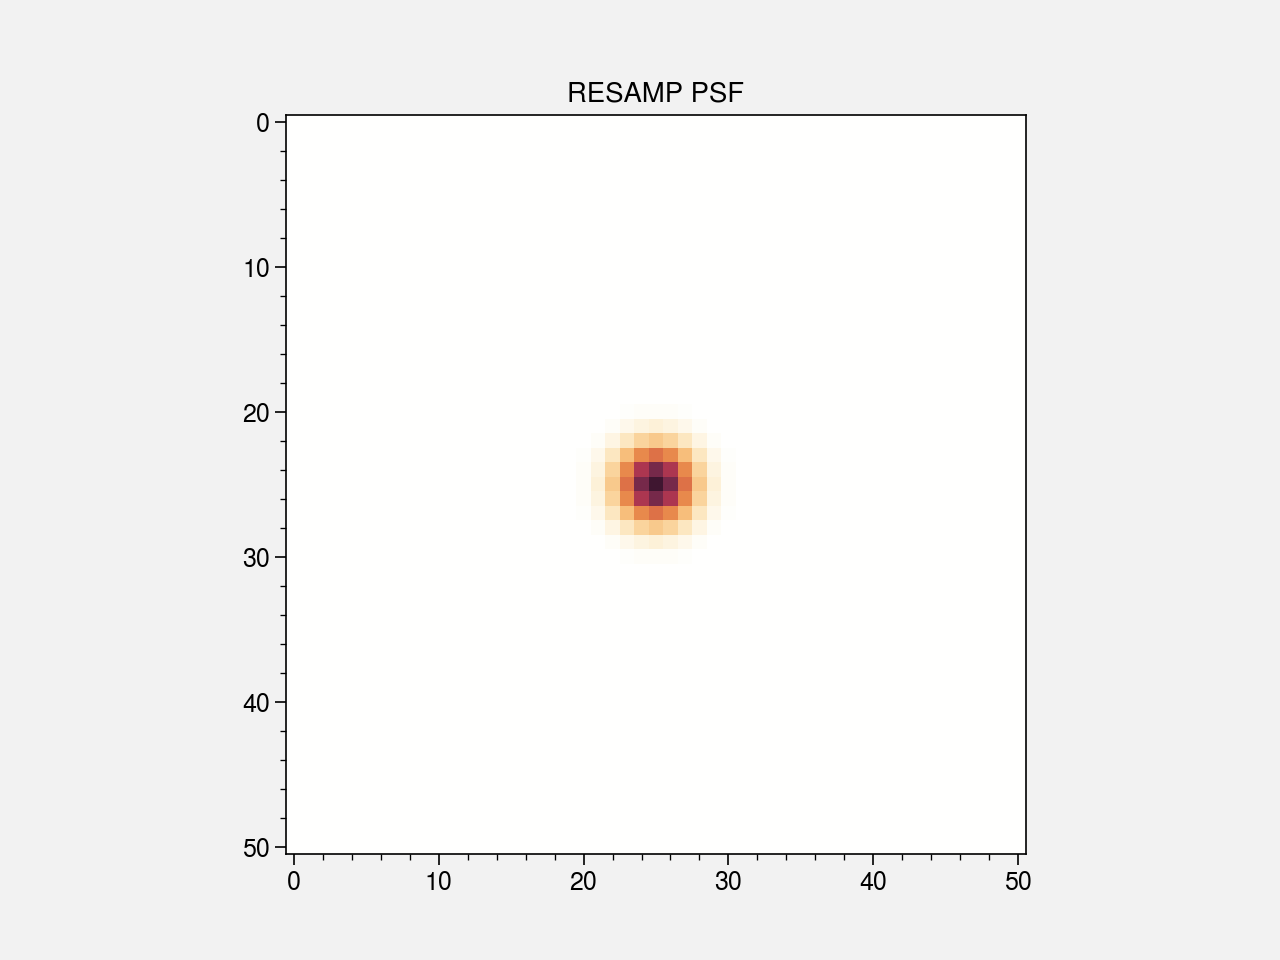

In [25]:
import tempfile
from pizza_cutter_sims.pizza_cutter import run_des_pizza_cutter_coadding_on_sim

coadd_rng = np.random.RandomState(seed=57)
with tempfile.TemporaryDirectory() as tmpdir:
    cdata = run_des_pizza_cutter_coadding_on_sim(
        rng=coadd_rng,
        tmpdir=tmpdir,
        single_epoch_config=cfg["pizza_cutter"]["single_epoch_config"],
        **data,
    )

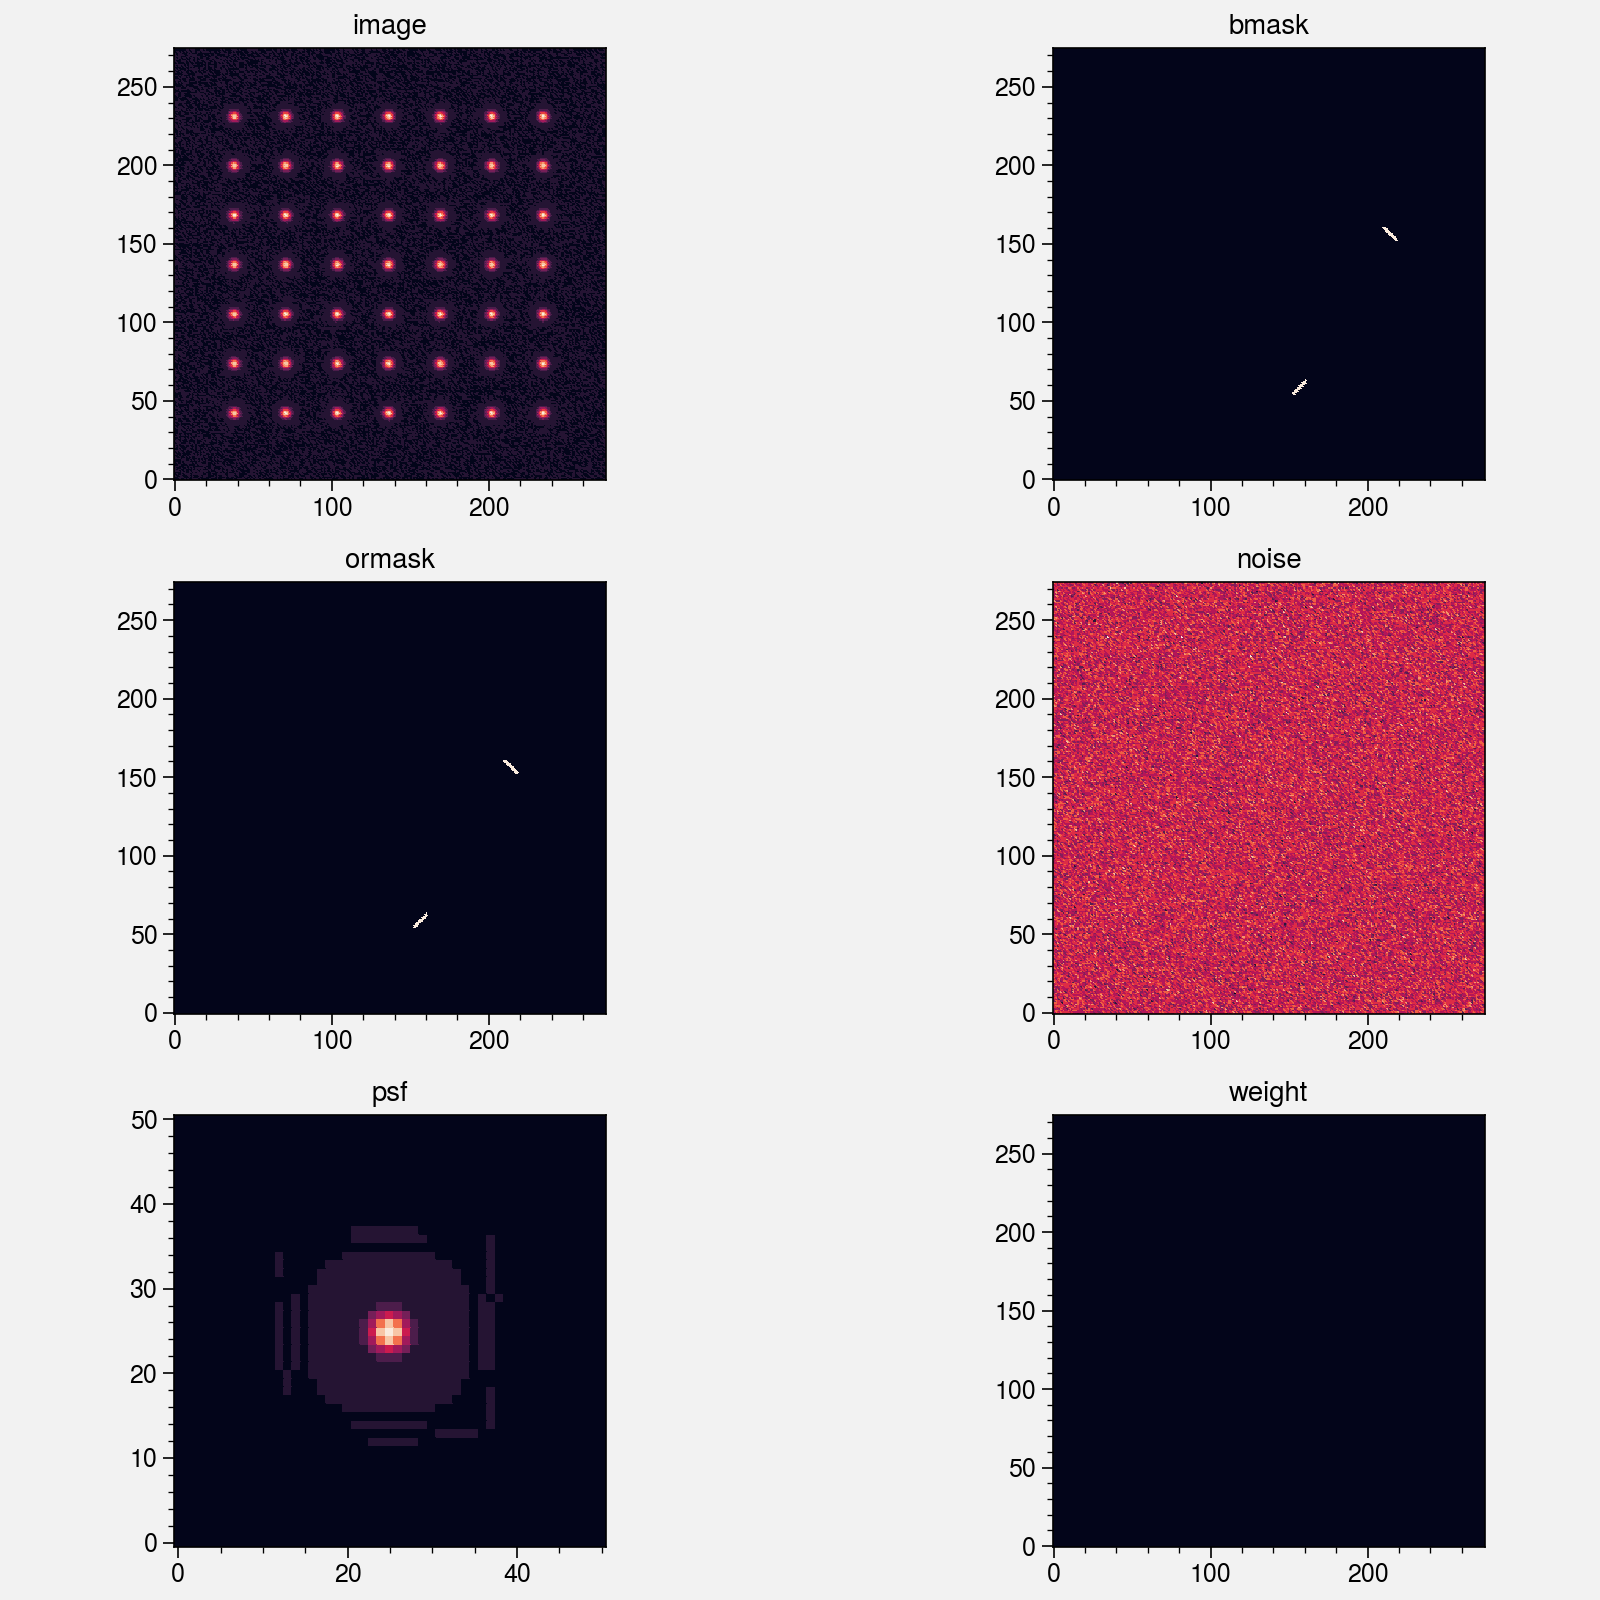

In [26]:
fig, axs = plot.subplots(nrows=3, ncols=2, figsize=(8, 8), share=0)

for i, key in enumerate(["image", "bmask", "ormask", "noise", "psf", "weight"]):
    
    axs[i].pcolormesh(cdata[key], cmap="rocket")
    axs[i].set_aspect(1)
    axs[i].set_title(key)


In [ ]:
fig, axs = plot.subplots(nrows=1, ncols=1, figsize=(8, 8), share=0)
axs.pcolormesh(cdata["rsd"][0]["image"] - cdata["rsd"][1]["image"], cmap="rocket")

In [28]:
flags = 0
flags |= 1
flags |= 2
print(flags)

3
